# Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import factorial
from itertools import product, permutations, combinations

In [2]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

# Input

In [3]:
number_of_nights = 7

matchbox_names = [('Jessica', 'Mike'), ('Monami', 'Leon'), ('Raphaela', 'Andre'), ('Dana', 'William'),
                  ('Monami', 'Antonino'), ('Jessica', 'Max'), ('Zaira', 'Marius')]

match = [False, False, False, None, False, False, True]

sold = [False, False, False, True, False, False, False]

matching_night_strings = [
    'Jessica und Leon,Joelina und Mike,Kerstin und Max,Monami und Antonino,Marie und Tim,Zaira und Dustin,Dana und William,Isabelle und Marius,Raphaela und Andre,Estelle und Jordi',
    'Raphaela und William,Estelle und Leon,Zaira und Jordi,Joelina und Mike,Kerstin und Max,Isabelle und Dustin,Marie und Marius,Monami und Antonino,Dana und Andre,Jessica und Tim',
    'Raphaela und Andre,Kerstin und Antonino,Monami und Max,Marie und Tim,Dana und William,Joelina und Mike,Zaira und Dustin,Isabelle und Marius,Estelle und Leon,Jessica und Jordi',
    'Estelle und Leon,Dana und William,Monami und Antonino,Zaira und Dustin,Joelina und Mike,Marie und Max,Raphaela und Jordi,Kerstin und Tim,Isabelle und Andre,Jessica und Marius',
    'Jessica und Leon,Estelle und Mike,Raphaela und Marius,Desiree und Tim,Joelina und Andre,Isabelle und Dustin,Monami und Max,Kerstin und Antonino,Zaira und Jordi,Dana und William',
    'Estelle und Mike,Raphaela und William,Dana und Antonino,Zaira und Marius,Isabelle und Dustin,Jessica und Leon,Marie und Andre,Kerstin und Max,Joelina und Tim,Desiree und Jordi',
    'Raphaela und William,Dana und Antonino,Isabelle und Dustin,Monami und Jordi,Desiree und Andre,Marie und Max,Kerstin und Tim,Joelina und Mike,Jessica und Leon,Zaira und Marius']

lichter = [3,2,2,3,2,4,6]

In [4]:
names_f = { 1: 'Dana', 2: 'Estelle', 3: 'Isabelle', 4: 'Jessica', 5: 'Joelina', 6: 'Kerstin', 
           7: 'Marie', 8: 'Monami', 9: 'Raphaela', 10: 'Zaira', 11: 'Desiree'}

names_m = { 1: 'Andre', 2: 'Antonino', 3: 'Dustin', 4: 'Jordi', 5: 'Leon', 6: 'Marius', 
           7: 'Max', 8: 'Mike', 9: 'Tim', 10: 'William'}

# Definitionen

### Namen zu Nummern

In [5]:
def name_to_number(name, dictionary):

    return list(dictionary.keys())[list(dictionary.values()).index(name)]

    # list(dictionary.keys()) = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # list(dictionary.values()) = ['name1','name2',...,'name10']
    # [1,2,4,8].index(4) = 2

### Zufällige Auswahl

In [6]:
def random_choice(combinations_list):
    
    print('Es könnte die Kombination\n')
    
    comb = random.choice(combinations_list)
    for i in range(n): # Loop über alle 10 Paare
        print(names_f[comb[i][0]] + ' und ' + names_m[comb[i][1]]) # ites Paar, 0 Frau, 1 Mann
        
    print('\nrichtig sein. Oder {} andere.'.format(len(combinations_list)-1))

In [7]:
def print_choice(comb):
    for i in range(n): # Loop über alle 10 Paare
        print(names_f[comb[i][0]] + ' und ' + names_m[comb[i][1]]) # ites Paar, 0 Frau, 1 Mann

### Matchbox

In [8]:
def create_pair(name_f, name_m):
    return (name_to_number(name_f, names_f), name_to_number(name_m, names_m))
    # Bsp. (1,4)

In [9]:
def matchbox(name_f, name_m, combinations_list, match = False): 
    # Jedes "no match" Ergebnis in der Match Box schließt die Kombinationen aus, die das Paar enthalten.
    # Das sind beim ersten Mal 9! = 362880 Kombinationen.
    # Jedes "match" Ergebnis in der Match Box schließt alle Kombinationen aus, die das Paar nicht enthalten.
    # Das wären beim ersten Mal 10!-9! = 3265920 Kombinationen.
    
    pair = create_pair(name_f, name_m)
    
    indices = []
    for i, comb in enumerate(combinations_list):
        if pair in comb:
            indices += [i] # indices of all combinations containing pair
            
    mask = [not match]*len(combinations_list) # all False for match = True, all True for match = False
    for x in indices:
        mask[x] = match # True for match = True, False for match = False
    
    new_possible_combinations_array = np.array(combinations_list)[mask] 
    # a = np.array([1,2,3,5,7])
    # mask = [True, True, False, True, False]
    # a[mask] = [1,2,5]
    
    new_possible_combinations = [[tuple(x) for x in comb] for comb in new_possible_combinations_array]
    # array enthält keine tupel mehr und erschwert wahrheitsabfragen wie pair in comb True/False? immens
    # fülle daher Werte wieder in liste von listen von tupeln
    
    return new_possible_combinations

### Matching Night

In [10]:
def create_guess(string, personsplit=' und ', paarsplit = ','):
        
    namen = [item.split(personsplit) for item in string.split(paarsplit)]
    # [['name_w1','name_m1'],...,[name_w10,name_m10]]
    
    nummern = [(name_to_number(namen[i][0], names_f),name_to_number(namen[i][1], names_m)) 
               for i in range(len(namen))]
    # Bsp. [(2,4),...,(3,10)]
    
    nummern_sorted = sorted(nummern)
    # Bsp. [(1,8),...(10,10)]
    
    return nummern_sorted

In [11]:
def find_missing(liste):
    for i in range(n):
        if liste[i][0] != i+1:
            counter = i
            break
        else:
            counter = n-1
    return counter

def gleich(comb1, comb2): # Wie viele Paare in zwei Kombinationen sind gleich
    missing_1 = find_missing(comb1)
    missing_2 = find_missing(comb2)
    comb1_copy = comb1[:]
    comb2_copy = comb2[:]
    del comb1_copy[missing_2]
    del comb2_copy[missing_1]
    return sum(a==b for a,b in zip(comb1_copy, comb2_copy)) # zip(a,b) = (a1,b1) ; (a2,b2) ; (a3,b3)

In [12]:
def matching_night(guess, anzahl, combinations_list): 
    
    # In der Matching Night wird ein bestimmter Guess überprüft. Es sind nur genau so viele Paare richtig,
    # wie Lichter angehen. Deshalb kommen nur noch Kombinationen in Betracht, die genau so viele Paare
    # mit dem Guess gleich haben, wie Lichter angingen.
    
    indices = []
    for i, comb in enumerate(combinations_list):
        if gleich(comb, guess) == anzahl: 
            indices += [i]

    mask = [False]*len(combinations_list)
    for x in indices:
        mask[x] = True

    combinations_left_array = np.array(combinations_list)[mask] 
    combinations_left_list = [[tuple(x) for x in comb] for comb in combinations_left_array]

    return combinations_left_list

### New Candidate

In [13]:
def new_candidate(possible_combinations):
    new_possible_combinations = []
    for comb in possible_combinations:
        for i in range(n):
            new_comb = comb[:] # echte Kopie der Kombination, damit immer nur bei einem Paar die neue Kandidatin
                               # eine alte ersetzt
            new_comb[i] = (n+1,new_comb[i][1])
            new_possible_combinations += [sorted(new_comb)]
    return possible_combinations + new_possible_combinations

# Alle möglichen Kombinationen

In [14]:
n = 10

In [15]:
print('Zu Beginn gibt es {} Fakultät = {} mögliche Kombinationen der Paare.'.format(n, factorial(n)))

Zu Beginn gibt es 10 Fakultät = 3628800 mögliche Kombinationen der Paare.


### Liste aller möglichen Kombinationen

In [24]:
tic()
list_of_permutations = list(permutations(range(n)))
#[(0,1,2,3,4,5,6,7,8,9),(0,1,2,3,4,5,6,7,9,8),...]

all_pairs = [list(product((i,), range(1,n+1))) for i in range(1,n+1)]
#[[(1,1),(1,2),...(1,10)],[(2,1),...(2,10)],...,[(10,1),...,(10,10)]]

possible_combinations = [[all_pairs[j][perm[j]] for j in range(n)] for perm in list_of_permutations] 
# e.g. 1st perm = (0,1,2,3,4,5,6,7,8,9) findet (all_pairs[j=0] = Frau1) mit Mann1 (perm[j=0] = 0), also (1,1)
# und dann (all_pairs[j=1] = Frau2) mit Mann2 (perm[j=1]=1, also (2,2)). 
# => 1st perm: [(1,1),(2,2),...,(9,9),(10,10)], 2nd perm: [(1,1),(2,2),...,(9,10),(10,9)]
toc()

Elapsed time: 10.177894 seconds.



In [25]:
len(possible_combinations)

3628800

# Events

In [26]:
events = ['initial']
lengths = [len(possible_combinations)]

for i in range(number_of_nights):
    
    print('Berechne Nacht {}:'.format(i+1))
    
    events += ['match \nbox {}'.format(i+1), 'matching\nnight {}'.format(i+1)]
    
    tic()
    if sold[i] == False:
        possible_combinations = matchbox(matchbox_names[i][0], matchbox_names[i][1], possible_combinations, match = match[i])
    lengths += [len(possible_combinations)]
    print('1/2 berechnet: Matchbox Kombinationen.')
    toc()
    
    tic()
    possible_combinations = matching_night(create_guess(matching_night_strings[i]), lichter[i], possible_combinations)
    lengths += [len(possible_combinations)]
    print('2/2 berechnet: Matching Night Kombinationen.')
    toc()
    
    if i == 3: #4te Nacht
        events += ['new\ncandidate']
        possible_combinations = new_candidate(possible_combinations)
        lengths += [len(possible_combinations)]
    
    print()

Berechne Nacht 1:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 74.356834 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 79.266987 seconds.


Berechne Nacht 2:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 3.814387 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 3.317816 seconds.


Berechne Nacht 3:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 0.792204 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 0.668233 seconds.


Berechne Nacht 4:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 0.000000 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 0.187717 seconds.


Berechne Nacht 5:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 0.296131 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 0.172173 seconds.


Berechne Nacht 6:
1/2 berechnet: Matchbox Kombinationen.
Elapsed time: 0.039973 seconds.

2/2 berechnet: Matching Night Kombinationen.
Elapsed time: 0.02

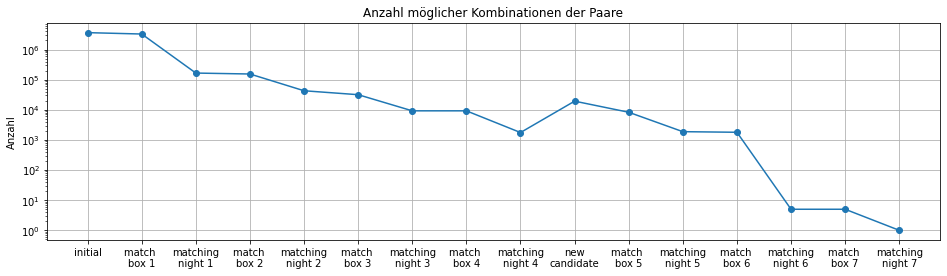

In [27]:
%matplotlib inline
fig = plt.figure(figsize = (number_of_nights*2+2,4))
pos = range(number_of_nights*2+2)
plt.errorbar(pos, lengths, marker = 'o')
plt.xticks(pos, events)
plt.title('Anzahl möglicher Kombinationen der Paare')
plt.ylabel('Anzahl')
plt.yscale('log')
plt.grid()
plt.show()

In [29]:
random_choice(possible_combinations)

Es könnte die Kombination

Dana und Antonino
Estelle und Jordi
Isabelle und Andre
Jessica und Leon
Joelina und Mike
Kerstin und Tim
Marie und Dustin
Monami und Max
Raphaela und William
Zaira und Marius

richtig sein. Oder 0 andere.


In [30]:
lengths

[3628800,
 3265920,
 165326,
 153936,
 42783,
 31666,
 9226,
 9226,
 1757,
 19327,
 8277,
 1878,
 1793,
 5,
 5,
 1]